# **1. Principal Component Analysis**
a. Apply PCA on CC dataset.

b. Apply k-means algorithm on the PCA result and report your observation if the silhouette score has improved or not?

c. Perform Scaling+PCA+K-Means and report performance.

In [627]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns
%config InlineBackend.figure_format='retina'

In [628]:
##Created a dataset named as cc_dataset with data provided in CSV file .
dataset = pd.read_csv('CC.csv')
dataset.keys()

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [659]:
#Head() method returns the first n rows from the dataframe.
dataset.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [660]:
dataset.shape

(8950, 17)

In [630]:
#The SimpleImputer class provides basic strategies for imputing missing values
X = dataset.iloc[:,1:]
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X)
X = imputer.transform(X)
X=pd.DataFrame(X)

In [631]:
pca = PCA(2)
x_pca = pca.fit_transform(X)
df2 = pd.DataFrame(data=x_pca)
finaldf = pd.concat([df2, X.iloc[:,-1]], axis=1)
finaldf.head()

,0,1,16
0,-4326.383956,921.566884,12.0
1,4118.916676,-2432.846347,12.0
2,1497.907660,-1997.578692,12.0
3,1394.548556,-1488.743450,12.0
4,-3743.351874,757.342659,12.0


In [632]:
#Data Analytics
dataset = dataset.iloc[:,1:]
dataset['MINIMUM_PAYMENTS'] = dataset['MINIMUM_PAYMENTS'].fillna(np.mean(dataset['MINIMUM_PAYMENTS']))
dataset['CREDIT_LIMIT'] = dataset['CREDIT_LIMIT'].fillna(np.mean(dataset['CREDIT_LIMIT']))
dataset.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [633]:
# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(dataset)

([<matplotlib.axis.XTick at 0x7f07199c8310>,
 <a list of 2 Text major ticklabel objects>)

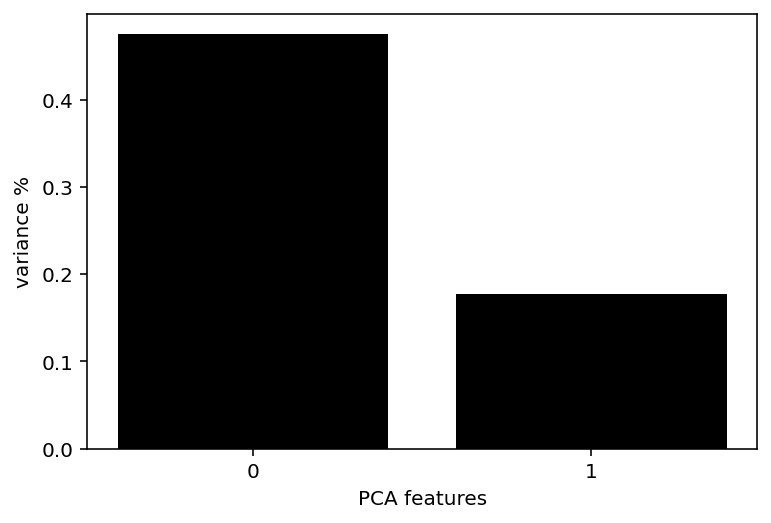

In [634]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [635]:
# Saving in components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

Fig above shows that the first two components explain the majority of the variance in our data.

Text(0, 0.5, 'PCA 2')

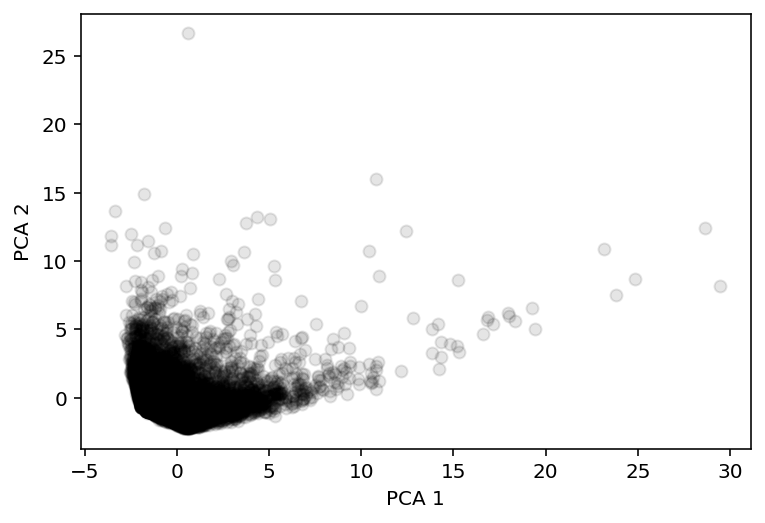

In [636]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

# **1.B. Apply k-means algorithm on the PCA result and report your observation if the silhouette score has improved or not?**

In [638]:
#Read Data Set
df = pd.read_csv('CC.csv')

In [639]:
x = df.iloc[:,[1,2,3,4]]
y = df.iloc[:,-1]

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['CUST_ID'] = le.fit_transform(df.CUST_ID.values)

pca2 = PCA(n_components=2)
principalComponents = pca2.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['TENURE']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,TENURE
0,-1500.250819,-1114.178407,12
1,-592.910661,1914.657567,12
2,217.734556,905.144354,12
3,927.782551,-198.923616,12
4,-1310.548986,-359.591021,12


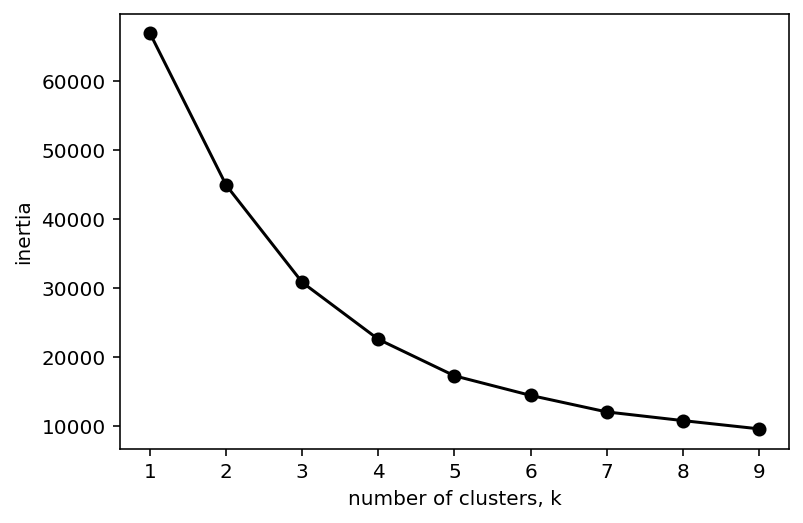

In [661]:
#K Means Algorithm
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [640]:
from sklearn.cluster import KMeans
nclusters = 2 #the k in kmeans
km = KMeans(n_clusters=nclusters)
km.fit(x)

# predicting the cluster for each data point
y_cluster_kmeans = km.predict(x)
from sklearn import metrics
score = metrics.silhouette_score(x, y_cluster_kmeans)
print(score)

0.7526240640619958


In [641]:
##Calculating the silhouette score for the above clustering
scaler = StandardScaler()
X_Scale = scaler.fit_transform(x)

pca2 = PCA(n_components=2)
principalComponents = pca2.fit_transform(X_Scale)

principalDf1 = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf1 = pd.concat([principalDf1, df[['TENURE']]], axis = 1)
finalDf1.head()

from sklearn.cluster import KMeans
nclusters = 2 #the k in kmeans
km = KMeans(n_clusters=nclusters)
km.fit(X_Scale)

# predicting the cluster for each data point
y_cluster_kmeans = km.predict(X_Scale)
from sklearn import metrics
score = metrics.silhouette_score(X_Scale, y_cluster_kmeans)
print(score)

0.6778894462339318


The silhouette score has improved

# **1.C. Perform Scaling+PCA+K-Means and report performance.**

In [642]:
#Head() method returns the first n rows from the dataset.
dataset.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [643]:
dataset.shape

(8950, 17)

In [644]:
dataset['TENURE'].value_counts()

12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: TENURE, dtype: int64

In [645]:
X = dataset.drop('TENURE',axis=1).values
y = dataset['TENURE'].values

In [646]:
#Scalling
scaler = StandardScaler()
X_Scale = scaler.fit_transform(X)

In [647]:
#PCA 
pca2 = PCA(n_components=2)
principalComponents = pca2.fit_transform(X_Scale)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, dataset[['TENURE']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,TENURE
0,-1.718893,-1.072941,12
1,-1.169306,2.509322,12
2,0.938413,-0.382596,12
3,-0.907502,0.045857,12
4,-1.637830,-0.684976,12


In [648]:
X = finalDf.drop('TENURE',axis=1).values
y = finalDf['TENURE'].values

In [649]:
#using train and Test data for K means 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=0)

In [650]:
#Calcualte Accuracy
%%time

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train,y_train)

y_train_hat =logisticRegr.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_hat)*100
print('"Accuracy for our Training dataset with PCA is: %.4f %%' % train_accuracy)

"Accuracy for our Training dataset with PCA is: 84.0543 %
CPU times: user 135 ms, sys: 33.8 ms, total: 169 ms
Wall time: 134 ms


# **2. Use pd_speech_features.csv**
# **a. Perform Scaling**
# **b. Apply PCA (k=3)**
# **c. Use SVM to report performance**

In [651]:
##Created a dataframe named as speech_df with data provided in CSV file 'pd_speech_features.csv’.
#Head() method returns the first n rows from the dataframe.
speech_df=pd.read_csv('pd_speech_features.csv')
speech_df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [652]:
#Data Analytics Perfrom Scaling
x =speech_df.iloc[:,1:]
scaler = StandardScaler()
scaler.fit(x)
speech_x_scaler = scaler.transform(x)
print(speech_x_scaler)

[[ 0.9687  0.6276  0.2561 ... -0.8147 -0.3666  0.5835]
 [ 0.9687  0.1216 -0.0804 ... -0.583   0.4004  0.5835]
 [ 0.9687  0.618  -0.3498 ... -0.8044 -0.7809  0.5835]
 ...
 [-1.0323  0.8134  0.3292 ... -0.7902 -0.7729 -1.7139]
 [-1.0323  0.5411  0.6959 ... -0.8263 -0.8117 -1.7139]
 [-1.0323  0.3946  0.9228 ... -0.841  -0.8281 -1.7139]]


In [653]:
#Apply PCA for K = 3
pca = PCA(3)
speech_x_pca = pca.fit_transform(speech_x_scaler)
speech_df2 = pd.DataFrame(data=speech_x_pca)
speech_finaldf = pd.concat([speech_df2,speech_df[['class']]],axis=1)
print(speech_finaldf)

             0         1          2  class
0   -10.052430  1.476818  -6.828356      1
1   -10.641065  1.590407  -6.811680      1
2   -13.520081 -1.243924  -6.794534      1
3    -9.142525  8.848869  15.300286      1
4    -6.758090  4.624221  15.645673      1
..         ...       ...        ...    ...
751  22.377450  6.470191   1.439471      0
752  13.503270  1.450490   9.344882      0
753   8.328507  2.392513  -0.911242      0
754   4.074595  5.417629  -0.847066      0
755   4.052810  6.076468  -2.022282      0

[756 rows x 4 columns]


In [654]:
#splitting the data into test and train data to calculate svm accuracy
clf = SVC(kernel='linear') 

x =speech_finaldf.iloc[:,:-1]
y =speech_finaldf.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
accuracy_score(y_test, y_pred)

print("svm accuracy =", accuracy_score(y_test, y_pred))

svm accuracy = 0.768


In [655]:
#Report Performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.20      0.33        69
           1       0.76      0.98      0.86       181

    accuracy                           0.77       250
   macro avg       0.79      0.59      0.59       250
weighted avg       0.78      0.77      0.71       250



# **3. Apply Linear Discriminant Analysis (LDA) on Iris.csv dataset to reduce dimensionality of data to k=2.**

In [656]:
# importing required packages
np.set_printoptions(precision=4)

In [657]:
#Created a dataframe named as df with data provided in CSV file 'Iris.csv’.
#Head() method returns the first n rows from the dataframe
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [658]:
#Standardize features
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(df.iloc[:,range(0,4)].values)


In [ ]:
class_le = LabelEncoder()
y = class_le.fit_transform(iris_df['Species'].values)

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train_std,y)

In [ ]:
data=pd.DataFrame(X_train_lda)
data['class']=y
data.columns=["LD1","LD2","class"]
data.head()

,LD1,LD2,class
0,9.423452,-0.513976,0
1,8.751900,-1.591678,0
2,8.973004,-1.068204,0
3,8.170186,-1.435135,0
4,9.249789,-0.136869,0


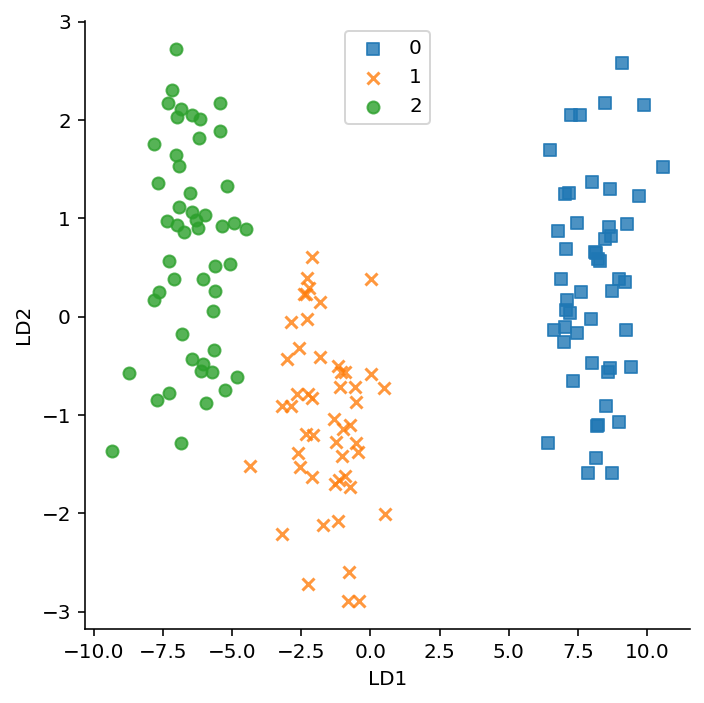

In [ ]:
markers = ['s', 'x', 'o']
colors = ['r', 'b', 'g']
sns.lmplot(x="LD1", y="LD2", data=data, hue='class', markers=markers, fit_reg=False, legend=False)
plt.legend(loc='upper center')
plt.show()

In [ ]:
# Constructing within-class covariant scatter matrix S_W
S_W = np.zeros((4,4))
for i in range(3):
    S_W += np.cov(X_train_std[y==i].T)

In [ ]:
S_W

array([[ 0.34  , -0.0647, -0.0069, -0.0369],
       [-0.0647,  1.1672,  0.783 ,  0.3461],
       [-0.0069,  0.783 ,  1.8616,  0.2181],
       [-0.0369,  0.3461,  0.2181,  0.1796]])

In [ ]:
#Construct between-class scatter matrix S_B
N=np.bincount(y) # number of samples for given class
vecs=[]
[vecs.append(np.mean(X_train_std[y==i],axis=0)) for i in range(3)] # class means
mean_overall = np.mean(X_train_std, axis=0) # overall mean
S_B=np.zeros((4,4))
for i in range(3):
    S_B += N[i]*(((vecs[i]-mean_overall).reshape(4,1)).dot(((vecs[i]-mean_overall).reshape(1,4))))

In [ ]:
S_B

array([[133.3393, 110.6733, -59.32  , 134.2179],
       [110.6733,  92.8059, -54.7706, 113.8033],
       [-59.32  , -54.7706,  58.7821, -73.7624],
       [134.2179, 113.8033, -73.7624, 141.1978]])

In [661]:
#Calculating sorted eigenvalues and eigenvectors of inverse(S_W)dot(S_B)
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs,key=lambda k: k[0], reverse=True)
print('Eigenvalues in decreasing order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

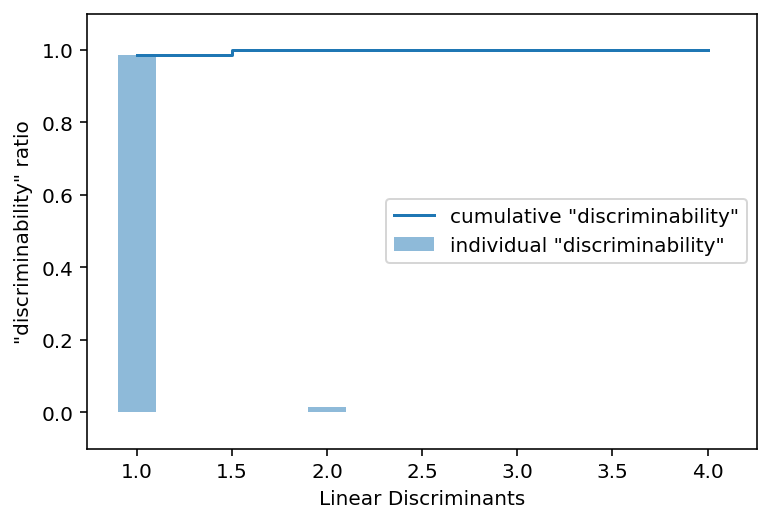

In [662]:
#Ploting of the main LDA components
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1, 5), discr, width=0.2,alpha=0.5, align='center',label='individual "discriminability"')
plt.step(range(1, 5), cum_discr, where='mid',label='cumulative "discriminability"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.show()

# **4. Briefly identify the difference between PCA and LDA**

1.Both LDA and PCA are methods of linear transformation.

2.LDA maximizes the distance between various classes, whereas PCA maximizes the variance of the data.

3.While PCA is an unsupervised method, LDA is supervised.

4.The transform method for LDA requires the X train and the Y train as two parameters. The transform method just needs one parameter, X train, when it comes to PCA. This illustrates how PCA does not rely on the output labels, whereas LDA considers the output class labels for choosing the linear discriminants.

5.When there are fewer samples in each class, PCA performs better. LDA, on the other hand, performs better on large datasets with many classes.